In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
# CSVファイルを読み込み
df = pd.read_csv("trajectoryFastWalk.csv")

# 必要な列があるか確認
if not set(['time','x', 'y',]).issubset(df.columns):
    raise ValueError("CSVに 'time','x', 'y',列が必要です")


# X-tグラフの描画

## データ抽出

In [3]:
# xの移動距離 = 現在のX座標 - 初期x座標
x_distance = df['x'] - df['x'].iloc[0] # iloc[n]はデータにより可変
y_distance = df['y'] - df['y'].iloc[0]


total_distance  = np.sqrt(x_distance**2 + y_distance**2)
time = df['time']

# 結果をDataFrameにまとめる
x_t = pd.DataFrame({
	'time':time,
	'total_distance':total_distance,
	})

print(x_t)


     time  total_distance
0    7.50        0.000000
1    7.75        0.227554
2    8.00        0.426782
3    8.25        0.621659
4    8.50        0.828560
5    8.75        1.039039
6    9.00        1.262144
7    9.25        1.488889
8    9.50        1.729912
9    9.75        1.963411
10  10.00        2.188995
11  10.25        2.417151
12  10.50        2.647135
13  10.75        2.901298
14  11.00        3.149154
15  11.25        3.389120
16  11.50        3.629841
17  11.75        3.870161
18  12.00        4.107026


## グラフの描画

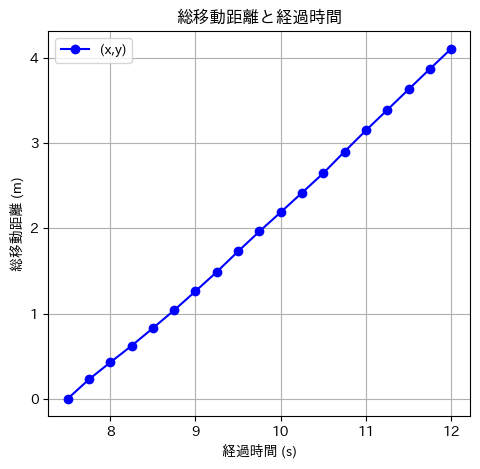

In [4]:

plt.figure(figsize=(10, 5))
plt.plot(time, total_distance, marker='o', linestyle='-', color='blue', label='(x,y)')
plt.xlabel('経過時間 (s)')
plt.ylabel('総移動距離 (m)')
plt.title('総移動距離と経過時間')
# 軸を揃える
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()

In [5]:

# 座標差分と時間差分を計算
dt = df['time'].diff()
dx = df['x'].diff()
dy = df['y'].diff()


# 移動距離と速度を計算（速度 = 距離 / 時間）
distance = np.sqrt(dx**2 + dy**2)
speed = distance / dt

# 1行目はNaNになるので除外
speed = speed[1:].reset_index(drop=True)

# 結果をDataFrameにまとめる
result_df = pd.DataFrame({'speed': speed})

       speed
0   0.910218
1   0.797269
2   0.779742
3   0.832840
4   0.847510
5   0.894651
6   0.907988
7   0.968367
8   0.934768
9   0.902376
10  0.921102
11  0.934458
12  1.019031
13  0.996755
14  0.970916
15  0.965638
16  0.963915
17  0.967987


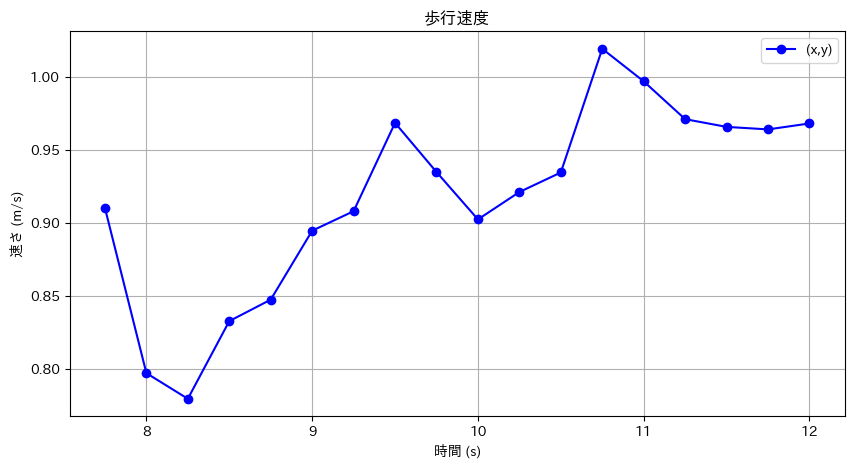

In [7]:
# 出力ファイル名
output_csv = "speedFastWalk.csv"

# CSV出力
result_df.to_csv(output_csv, index=False)

# 結果を表示
print(result_df)

# 時間も1行目を除いて整形（速度と対応する時間）
time = df['time'][1:].reset_index(drop=True)

# グラフ描画
plt.figure(figsize=(10, 5))
plt.plot(time, speed, marker='o', linestyle='-', color='blue', label='(x,y)')
plt.xlabel('時間 (s)')
plt.ylabel('速さ (m/s)')
plt.title('歩行速度')
plt.grid(True)
plt.legend()